## Random Forest Decision Tree

Training Data Score: 0.9623936328992785

Testing Data Score: 0.8953342644984792


In [26]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import os
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [28]:
# import processed data
path = "Trends/"
file = "finalFeatures.csv"
path_file = path + file
df = pd.read_csv(path_file)
df

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20,4.59
5,1995,17.02,74253,95216,87318,22603,1.38,7905,11539,18.43,6.03
6,1996,20.64,81884,103284,103306,23513,1.02,6494,12485,22.12,5.68
7,1997,19.11,77962,108001,99861,24271,1.34,6896,14136,20.61,5.35
8,1998,12.76,82872,109718,108892,25117,1.09,6601,15135,14.42,5.31
9,1999,17.90,92405,116301,131385,25741,0.86,8601,15331,19.35,4.83


In [29]:
df.shape

(29, 11)

In [30]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

data_df = df.drop("retail", axis=1)
target = df["retail"]
#target
Years = df["Year"]

feature_names = data_df.columns
data_df.head()

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20


In [31]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

x = df.drop("retail", axis=1)
y = df["retail"]
target = y
data_df = x
print(x.shape)
print(y.shape)

(29, 10)
(29,)


Old Code. Should not work past this point with curretn data set.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df, target, random_state=42)

In [33]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.90363451719565

In [34]:
print('Test Acc: %.3f' % rf.score(X_test, y_test))

Test Acc: 0.904


In [35]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9592343342661642
Testing Data Score: 0.90363451719565


In [66]:
featrue_influence = sorted(zip(rf.feature_importances_.round(decimals=4), feature_names), reverse=True)

In [68]:
featrue_influence_df = pd.DataFrame(featrue_influence)
featrue_influence_df

,0,1
0,0.6079,ICO composite (USD $/lb)
1,0.0678,Brent ave closing USD
2,0.0574,Year
3,0.0502,Domestic Consumption (In 1K 60-kg bags)
4,0.0439,Coffe Produciton (In 1K 60-kg bags) crop year
5,0.0433,Inventories (In 1K 60-kg bags)
6,0.0423,WTI ave closing price USD
7,0.0389,Coffe Export (In 1K 60-kg bags) crop year
8,0.0329,re-exports (In 1K 60-kg bags) Calendar Year 35c
9,0.0153,Coffe Imports (In 1K 60-kg bags) Calendar Year...


In [37]:
print(y_train.shape)
print(y_test.shape)

(21,)
(8,)


In [38]:
three_feature_df = data_df.drop(columns= ['Coffe Imports (In 1K 60-kg bags) Calendar Year 137c',
                                         're-exports (In 1K 60-kg bags) Calendar Year 35c',
                                         'Inventories (In 1K 60-kg bags)',
                                         'Coffe Export (In 1K 60-kg bags) crop year',
                                         'Coffe Produciton (In 1K 60-kg bags) crop year',
                                        'Brent ave closing USD',
                                         'Domestic Consumption (In 1K 60-kg bags)',
                                         'Brent ave closing USD'])

In [39]:
two_feature_df = data_df.drop(columns= ['Coffe Imports (In 1K 60-kg bags) Calendar Year 137c',
                                         're-exports (In 1K 60-kg bags) Calendar Year 35c',
                                         'Inventories (In 1K 60-kg bags)',
                                         'Coffe Export (In 1K 60-kg bags) crop year',
                                         'Coffe Produciton (In 1K 60-kg bags) crop year',
                                        'Brent ave closing USD',
                                         'Domestic Consumption (In 1K 60-kg bags)',
                                         'Brent ave closing USD',
                                         'WTI ave closing price USD'])

In [49]:
#two_feature_df

In [50]:
X_train, X_test, y_train, y_test = train_test_split(three_feature_df, target, random_state=42)

In [51]:
optimized_model = RandomForestRegressor(n_estimators=200)
optimized_model= optimized_model.fit(X_train, y_train)
optimized_model.score(X_test, y_test)

0.9022081355584002

In [52]:
print(f"Training Data Score: {optimized_model.score(X_train, y_train)}")
print(f"Testing Data Score: {optimized_model.score(X_test, y_test)}")

Training Data Score: 0.9522973442202423
Testing Data Score: 0.9022081355584002


# Predicting price with: Year ICO indicator, and Brent OIL

In [53]:
# Three feature Inputs: Inputs 
y_pred_three = optimized_model.predict(three_feature_df)

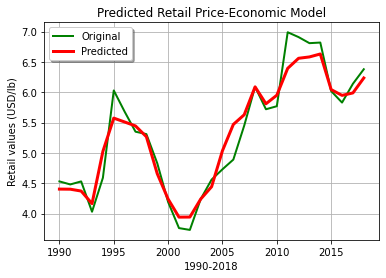

In [54]:
x_ax = Years
plt.plot(x_ax, target, linewidth=2, label="Original", color ="green")
plt.plot(x_ax, y_pred_three, linewidth=3.0, label="Predicted", color = "red")
plt.title("Predicted Retail Price-Economic Model")
plt.xlabel('1990-2018')
plt.ylabel('Retail values (USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('Econimic_model.png')
plt.show() 

In [62]:
print(f"Training Data Score: {optimized_model.score(X_train, y_train)}")
print(f"Testing Data Score: {optimized_model.score(X_test, y_test)}")

Training Data Score: 0.9556672078255293
Testing Data Score: 0.8425748132424334


# Prediction Retal price with: Year and ICO indicator only

In [55]:
X_train, X_test, y_train, y_test = train_test_split(two_feature_df, target, random_state=42)

In [57]:
optimized_model = RandomForestRegressor(n_estimators=200)
optimized_model= optimized_model.fit(X_train, y_train)
optimized_model.score(X_test, y_test)

0.8425748132424334

In [58]:
# Two feature Inputs: Inputs 
y_pred_two = optimized_model.predict(two_feature_df)

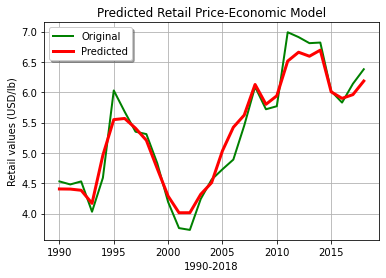

In [59]:
x_ax = Years
plt.plot(x_ax, target, linewidth=2, label="Original", color ="green")
plt.plot(x_ax, y_pred_bs, linewidth=3.0, label="Predicted", color = "red")
plt.title("Predicted Retail Price-Economic Model")
plt.xlabel('1990-2018')
plt.ylabel('Retail values (USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('Econimic_model.png')
plt.show() 

In [63]:
print(f"Training Data Score: {optimized_model.score(X_train, y_train).round(decimals=4)}")
print(f"Testing Data Score: {optimized_model.score(X_test, y_test).round(decimals=4)}")

Training Data Score: 0.9557
Testing Data Score: 0.8426


In [61]:
two_feature_df.head(1)

,Year,ICO composite (USD $/lb)
0,1990,0.72
1,1991,0.67
2,1992,0.53
3,1993,0.62
4,1994,1.34
5,1995,1.38
6,1996,1.02
7,1997,1.34
8,1998,1.09
9,1999,0.86
